In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [27]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///./Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create session from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [35]:
# Print columns
inspector = inspect(engine)
measurement_columns = inspector.get_columns('measurement')
station_columns = inspector.get_columns('station')

for column in measurement_columns:
    print(column["name"],column["type"])

print('\n')    

for column in station_columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [80]:
# Find the most recent date in the data set.
recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent = recent[0]
print(recent)

2017-08-23


In [110]:
## Retrieve the last 12 months of precipitation data and plot the results starting from the most recent data point.
# Calculate the date one year from the last date in data set.
one_year = recent - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.date, Measurement.prcp]
year_data = session.query(*sel).filter(Measurement.date > one_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_data = pd.DataFrame(year_data, columns=['Date','Precipitation'])
prcp_data = prcp_data.sort_values(['Date'], ascending=True)
prcp_data = prcp_data.set_index('Date')
prcp_data = prcp_data.dropna()

prcp_data

Precipitation
Date                     
2016-08-24           0.08
2016-08-24           2.15
2016-08-24           2.28
2016-08-24           2.15
2016-08-24           1.45
...                   ...
2017-08-22           0.00
2017-08-23           0.08
2017-08-23           0.00
2017-08-23           0.00
2017-08-23           0.45

[2015 rows x 1 columns]

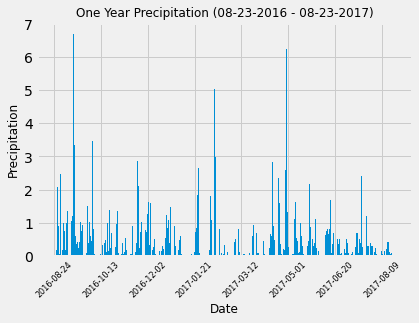

In [124]:
## Plot the data
plt.figure()

# Get x and y values 
x_date = prcp_data.index
y_prcp = prcp_data['Precipitation']

# Create x axis ticks 
x_ticks = np.arange(0, 400, 50)
plt.xticks(x_ticks, rotation=45, fontsize=8) 

# Plot
plt.bar(x_date,y_prcp, align='center')
plt.title(f"One Year Precipitation (08-23-2016 - 08-23-2017)", fontsize=12)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Precipitation", fontsize=12)
plt.show()

In [131]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_data.describe()

Precipitation
count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000

# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()